# Лабораторная работа №3 "Линейные структуры данных"
by Константин Киселев, МОА-211

In [70]:
import timeit
import matplotlib.pyplot as plt

### Задание 1
Возьмите реализацию класса UnorderedList из лекционных материалов и выполните
следующие доработки:
1. Реализуйте оставшиеся методы этого класса append(item), index(item),
insert(pos,item), pop(), pop(pos). Требования к работе этих методов посмотрите в
лекционной презентации.
2. Реализуйте метод \_\_str\_\_, чтобы содержимое списка отображалось в Python-стиле (в
квадратных скобках).
3. Реализуйте метод “среза”. Он должен принимать два параметра (start и stop) и
возвращать копию списка, начиная с позиции start и заканчивая (но не включая!)
позицией stop.

Все выполненные доработки должны быть протестированы

In [63]:
class Node:
    def __init__(self, initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self, newdata):
        self.data = newdata

    def setNext(self, newnext):
        self.next = newnext


class UnorderedList:
    def __init__(self):
        self.head = None

    def isEmpty(self):
        return self.head == None

    def add(self, item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp

    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count

    def search(self, item):
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()

        return found

    def remove(self, item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()

        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())

    def append(self, item):  # добавляет элемент в конец списка
        if self.head is None:
            self.head = Node(item)
            return
        current = self.head
        while current.getNext() is not None:
            current = current.getNext()
        temp = Node(item)
        current.setNext(temp)

    def index(self, item):  # возвращает индекс элемента, найденного по значению
        current = self.head
        idx = -1
        while current != None:
            idx += 1
            if current.getData() == item:
                break
            current = current.getNext()
        return idx

    def insert(self, pos, item):  # вставляет элемент на заданную позицию
        if pos == 0:
            self.add(item)
            return
        previous = self.head
        for i in range(pos - 1):
            previous = previous.getNext()
        current = previous.getNext()
        temp = Node(item)
        temp.setNext(current)
        previous.setNext(temp)

    def pop(self, *args):
        current = self.head
        if len(args):
            for i in range(args[0]):
                current = current.getNext()
        else:
            while current.getNext() is not None:
                current = current.getNext()
        temp = current.getData()
        self.remove(current.getData())
        return temp

    def __str__(self):
        current = self.head
        result = "["

        while current is not None:
            result += str(current.getData())
            if current.getNext() is not None:
                result += ", "
            current = current.getNext()
        result += "]"
        return result

    def __getitem__(self, index):
        current = self.head
        if isinstance(index, slice):
            result = UnorderedList()
            start = index.start if index.start else 0
            stop = index.stop if index.stop else self.size()
            if stop > self.size():
                raise IndexError("Index out of range")
            step = index.step if index.step else 1
            if step < 0:
                raise IndexError("Step of slice is only positive number")
            for i in range(start):
                current = current.getNext()
            elems = (stop - start) // step
            for i in range(elems):
                result.append(current.getData())
                for j in range(step):
                    if current.getNext():
                        current = current.getNext()
        else:
            for i in range(index - 1):
                current = current.getNext()
            result = current.getData()
        return result

    def slice(self, start, stop):
        result = UnorderedList()
        current = self.head
        index = 0

        while index < start and current is not None:
            current = current.getNext()
            index += 1

        while index < stop and current is not None:
            result.append(current.getData())
            current = current.getNext()
            index += 1

        return result


lst = UnorderedList()
lst.append(10)
lst.append(20)
lst.append(40)
lst.append(50)
lst.insert(0, 30)
print(f"List: {lst}")
print(f"Index of 30: {lst.index(30)}")
lst.pop()
lst.pop(0)
print(f"List after pop() and pop(0) with pos: {lst}")
print(f"Slice: {lst[0::2]}")

List: [30, 10, 20, 40, 50]
Index of 30: 0
List after pop() and pop(0) with pos: [10, 20, 40]
Slice: [10]


### Задание 2

Напишите функцию move_to_front для чтения строк с клавиатуры и сохранения их в
связном списке без повторов. Пользователь последовательно вводит с клавиатуры n строк.
При вводе строки, которая раньше не встречалась, вставьте ее в начало списка. При вводе
уже внесенной строки удалите ее из списка и снова вставьте в начало.

Такая функция реализует стратегию «сдвиг в начало», которая применяется в кешировании,
при сжатии данных и т.д.


In [69]:
def move_to_front(lst: UnorderedList, item):
    if lst.search(item):
        lst.remove(item)
    lst.insert(0, item)


lst = UnorderedList()
for i in range(int(input("введите количество строк: "))):
    print(item := input())
    move_to_front(lst, item)
print(lst)

абв
где
жзи
абв
[абв, жзи, где]


### Задание 3

Напишите функцию, которая принимает в качестве аргумента первый узел односвязного
списка, обращает порядок элементов списка (с разрушением исходного) и возвращает в
качестве результата первый узел полученного списка. Разработайте два варианта решения
этой задачи: 
1) итеративный 
2) рекурсивный.


In [68]:
def iterative_reverse(node: Node):
    prev = None
    current = node

    while current is not None:
        next_node = current.getNext()
        current.setNext(prev)
        prev = current
        current = next_node

    return prev


def recursive_reverse(node: Node):
    if node is None:
        return None
    elif node.getNext() is None:
        return node

    rest = recursive_reverse(node.getNext())
    node.getNext().setNext(node)
    node.setNext(None)
    return rest


lst = UnorderedList()
lst2 = UnorderedList()
for i in range(10, 51, 10):
    lst.append(i)
    lst2.append(i)

print(f"Начальный список: {lst}")
print(f"Результат работы итеративной функции: {iterative_reverse(lst.head).getData()}")
print(f"Cписок после итеративной: {lst}")
print(f"Результат работы рекурсивной функции: {recursive_reverse(lst2.head).getData()}")
print(f"Cписок после рекурсивной: {lst}")

Начальный список: [10, 20, 30, 40, 50]
Результат работы итеративной функции: 50
Cписок после итеративной: [10]
Результат работы рекурсивной функции: 50
Cписок после рекурсивной: [10]


### Задание 4
Используя реализацию связного списка из задания № 1 (класс UnorderedList), реализуйте
следующие линейные структуры (необходимый набор методов посмотрите в лекционной
презентации):
1. Стек.
2. Очередь.
3. Дек.

Проведите тестирование реализованных линейных структур.

Продумайте и проведите показательный эксперимент, сравнивающий производительность
стека, очереди или дека, основанных на списках Python, с реализациями на основе
связанного списка. Например, для сравнения можно взять какую-либо операцию
выбранной линейной структуры.

Stack:
Empty before push: True
Peek: dog
Size: 3
Empty after push: False
[4, dog, True, 8.4]
Pop: True
Size after pop: 2
[4, dog] 

Queue:
Empty before enqueue: True
[True, dog, 4]
Size after enqueue: 3
Empty after enqueue: False
[8.4, True, dog, 4]
Size after dequeue: 2
[8.4, True] 

Deque:
Empty before add: True
[dog, 4, cat, True]
Size after add: 4
Empty after add: False
[8.4, dog, 4, cat, True]
[dog, 4, cat, True]
[dog, 4, cat]


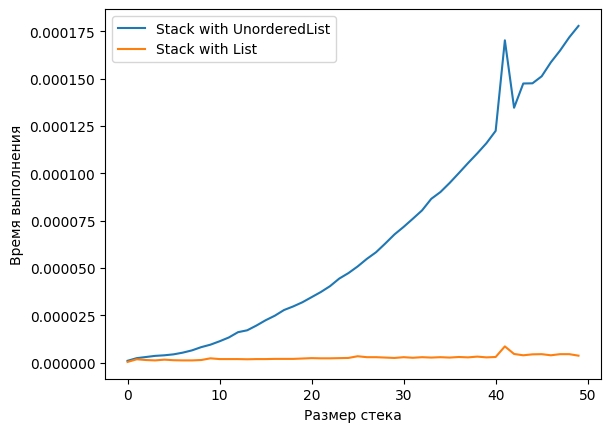

In [73]:
class Stack:
    def __init__(self):
        self.items = UnorderedList()

    def isEmpty(self):
        return self.items.isEmpty()

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        result = self.items.pop()
        self.items.append(result)
        return result

    def size(self):
        return self.items.size()

    def __str__(self):
        return str(self.items)


class StackOld:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[-1]

    def size(self):
        return len(self.items)


class Queue:
    def __init__(self):
        self.items = UnorderedList()

    def isEmpty(self):
        return self.items.isEmpty()

    def enqueue(self, item):
        self.items.add(item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return self.items.size()

    def __str__(self):
        return str(self.items)


class QueueOld:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0, item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)


class Deque:
    def __init__(self):
        self.items = UnorderedList()

    def isEmpty(self):
        return self.items.isEmpty()

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.add(item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return self.items.size()

    def __str__(self):
        return str(self.items)


class DequeOld:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0, item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)


def test():
    print("Stack:")
    s = Stack()
    print("Empty before push:", s.isEmpty())
    s.push(4)
    s.push("dog")
    print("Peek:", s.peek())
    s.push(True)
    print("Size:", s.size())
    print("Empty after push:", s.isEmpty())
    s.push(8.4)
    print(s)
    s.pop()
    print("Pop:", s.pop())
    print("Size after pop:", s.size())
    print(s, "\n")

    print("Queue:")
    q = Queue()
    print("Empty before enqueue:", q.isEmpty())
    q.enqueue(4)
    q.enqueue("dog")
    q.enqueue(True)
    print(q)
    print("Size after enqueue:", q.size())
    print("Empty after enqueue:", q.isEmpty())
    q.enqueue(8.4)
    print(q)
    q.dequeue()
    q.dequeue()
    print("Size after dequeue:", q.size())
    print(q, "\n")

    print("Deque:")
    d = Deque()
    print("Empty before add:", d.isEmpty())
    d.addRear(4)
    d.addRear("dog")
    d.addFront("cat")
    d.addFront(True)
    print(d)
    print("Size after add:", d.size())
    print("Empty after add:", d.isEmpty())
    d.addRear(8.4)
    print(d)
    d.removeRear()
    print(d)
    d.removeFront()
    print(d)


def testTime(stack, i):
    for j in range(0, i):
        stack.pop()


test()

s = Stack()
so = StackOld()

time_stack = timeit.Timer("testTime(s, i)", globals=globals())
time_stack_old = timeit.Timer("testTime(so, i)", globals=globals())

plt_x = []
plt_stack = []
plt_stack_old = []

for i in range(0, 50):
    plt_x.append(i)

    for j in range(0, i):
        s.push(j)
        so.push(j)

    time1 = time_stack.timeit(number=1)
    plt_stack.append(time1)

    time2 = time_stack_old.timeit(number=1)
    plt_stack_old.append(time2)

plt.plot(plt_x, plt_stack, label="Stack with UnorderedList")
plt.plot(plt_x, plt_stack_old, label="Stack with List")
plt.xlabel("Размер стека")
plt.ylabel("Время выполнения")
plt.legend()
plt.show()